In [1]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")


Qiskit version: 2.1.1
Grader version: 0.22.12


In [3]:
# Import common packages first
import numpy as np

# Import qiskit classes
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# Import utils and cosystems
from lab4_util import hamming_distance, minimum_distance, bring_states, matrixRank
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2  as Sampler

# Import grader
from qc_grader.challenges.qgss_2025 import (
    grade_lab4_ex1, 
    grade_lab4_ex2, 
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6
)



In [4]:
# Example usage:
str1 = "10110"
str2 = "11100"
dist = hamming_distance(str1, str2)
print(f"Hamming distance between '{str1}' and '{str2}' is: {dist}") # Output: 2

vec1 = [1, 0, 0, 1]
vec2 = [0, 0, 1, 1]
dist_vec = hamming_distance(vec1, vec2)
print(f"Hamming distance between {vec1} and {vec2} is: {dist_vec}") # Output: 2


Hamming distance between '10110' and '11100' is: 2
Hamming distance between [1, 0, 0, 1] and [0, 0, 1, 1] is: 2


In [5]:
# --- Example: A Simple [4, 3, 2] Parity Check Code ---
# This code takes 3 message bits (k=3) and adds an even parity bit
# to make the total codeword length n=4.
# Messages: 000, 001, 010, 011, 100, 101, 110, 111
# Codewords (adding even parity bit):
parity_code_4_3 = [
    "0000", # 000 + 0 (even parity)
    "0011", # 001 + 1
    "0101", # 010 + 1
    "0110", # 011 + 0
    "1001", # 100 + 1
    "1010", # 101 + 0
    "1100", # 110 + 0
    "1111"  # 111 + 1
]

# Calculate the minimum distance d
d_parity = minimum_distance(parity_code_4_3)
print(f"Codewords: {parity_code_4_3}")
print(f"Calculated minimum distance d = {d_parity}") # Output: 2


Codewords: ['0000', '0011', '0101', '0110', '1001', '1010', '1100', '1111']
Calculated minimum distance d = 2


In [6]:
# --- Example: [3, 1, 3] Repetition Code ---
repetition_code_3_1 = ["000", "111"]
d_repetition = minimum_distance(repetition_code_3_1)
print(f"Calculated minimum distance d = {d_repetition}") # Output: 3

# Capabilities for d=3:
t_detect = d_repetition - 1
t_correct = int((d_repetition - 1) / 2) // 1
print(f"Error Detection Capability (t_detect = d-1): {t_detect}") # Output: 2
print(f"Error Correction Capability (t_correct = floor((d-1)/2)): {t_correct}") # Output: 1



Calculated minimum distance d = 3
Error Detection Capability (t_detect = d-1): 2
Error Correction Capability (t_correct = floor((d-1)/2)): 1


In [7]:
test_str = "010"

print("Hamming distance between 010 and 000 is", hamming_distance(test_str, "000"))
print("Hamming distance between 010 and 111 is", hamming_distance(test_str, "111"))

Hamming distance between 010 and 000 is 1
Hamming distance between 010 and 111 is 2


In [11]:
hardcode_decoder_bit_flip_syndrome_map = {
    # --- TODO : Task 1 ---
    # Fill in the other entries of the decoder (leave the "" in place).
    #{"s1s0": "Error Code"}
    '00': 'I',
    '01': 'X2',
    '10': 'X0',
    '11': 'X1',
    # --- End of TODO ---
}

In [12]:
grade_lab4_ex1(hardcode_decoder_bit_flip_syndrome_map )

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [13]:
# --- TODO : Task 2 ---
# Fill in the other error codes
steane_decoder_syndrome_map = {
    '111000': 'X0',
    '011000': 'X1',
    '101000': 'X2',
    '001000': 'X3',
    '110000': 'X4',
    '010000': 'X5',
    '100000': 'X6',
    '111111': 'Y0',
    '011011': 'Y1',
    '101101': 'Y2',
    '001001': 'Y3',
    '110110': 'Y4',
    '010010': 'Y5',
    '100100': 'Y6',
    '000111': 'Z0',
    '000011': 'Z1',
    '000101': 'Z2',
    '000001': 'Z3',
    '000110': 'Z4',
    '000010': 'Z5',
    '000100': 'Z6',
    '000000': 'I'
}
# --- End of TODO ---

In [14]:
grade_lab4_ex2(steane_decoder_syndrome_map)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [17]:
def measure_steane_syndrome(qc, q_data, q_anc, c_reg):

    # Measure X-type Stabilizers (S0, S1, S2 -> q_anc[0], q_anc[1], q_anc[2])
    # Apply H to data qubits -> CNOT -> Apply H to data qubits -> Measure ancilla
    qc.h(q_data) # H on data qubits

    # S0: IIIXXXX (X_3 X_2 X_1 X_0) -> q_anc[0]
    qc.cx(q_data[0], q_anc[0])
    qc.cx(q_data[1], q_anc[0])
    qc.cx(q_data[2], q_anc[0])
    qc.cx(q_data[3], q_anc[0])

    # ---- TODO : Task 3 (Completed) ---
    # S1: IXXIIXX -> q_anc[1]
    qc.cx(q_data[0], q_anc[1])
    qc.cx(q_data[1], q_anc[1])
    qc.cx(q_data[4], q_anc[1])
    qc.cx(q_data[5], q_anc[1])

    # S2: XIXIXIX -> q_anc[2]
    qc.cx(q_data[0], q_anc[2])
    qc.cx(q_data[2], q_anc[2])
    qc.cx(q_data[4], q_anc[2])
    qc.cx(q_data[6], q_anc[2])
    # --- End of TODO ---

    qc.h(q_data) # Restore H on data qubits
    qc.measure(q_anc[0:3], c_reg[0:3]) # Measure X syndrome (s0, s1, s2)
    qc.barrier()


    # ---- TODO : Task 3 (Completed) ---
    # Measure Z-type Stabilizers (S3, S4, S5 -> q_anc[3], q_anc[4], q_anc[5])
    # CNOT -> Measure ancilla
    
    # S3: IIIZZZZ -> q_anc[3]
    qc.cx(q_data[0], q_anc[3])
    qc.cx(q_data[1], q_anc[3])
    qc.cx(q_data[2], q_anc[3])
    qc.cx(q_data[3], q_anc[3])

    # S4: IZZIIZZ -> q_anc[4]
    qc.cx(q_data[0], q_anc[4])
    qc.cx(q_data[1], q_anc[4])
    qc.cx(q_data[4], q_anc[4])
    qc.cx(q_data[5], q_anc[4])

    # S5: ZIZIZIZ -> q_anc[5]
    qc.cx(q_data[0], q_anc[5])
    qc.cx(q_data[2], q_anc[5])
    qc.cx(q_data[4], q_anc[5])
    qc.cx(q_data[6], q_anc[5])
    # --- End of TODO ---
    
    qc.measure(q_anc[3:6], c_reg[3:6]) # Measure Z syndrome (s3, s4, s5)
    qc.barrier()

In [18]:
state = bring_states()

# Logical qubit (7 data qubits)
qr_data = QuantumRegister(7, name='q')
# Ancilla qubits for syndrome measurement (6)
qr_anc = QuantumRegister(6, name='anc')
# Classical registers for syndrome (initial & verify)
cr_initial_syn = ClassicalRegister(6, name='c_initial_syn')
cr_final_syn = ClassicalRegister(6, name='c_final_syn')

# Total circuit (13 qubits, 12 classical bits)
qc = QuantumCircuit(qr_data, qr_anc, cr_initial_syn, cr_final_syn)
qc.initialize(state, qr_data)

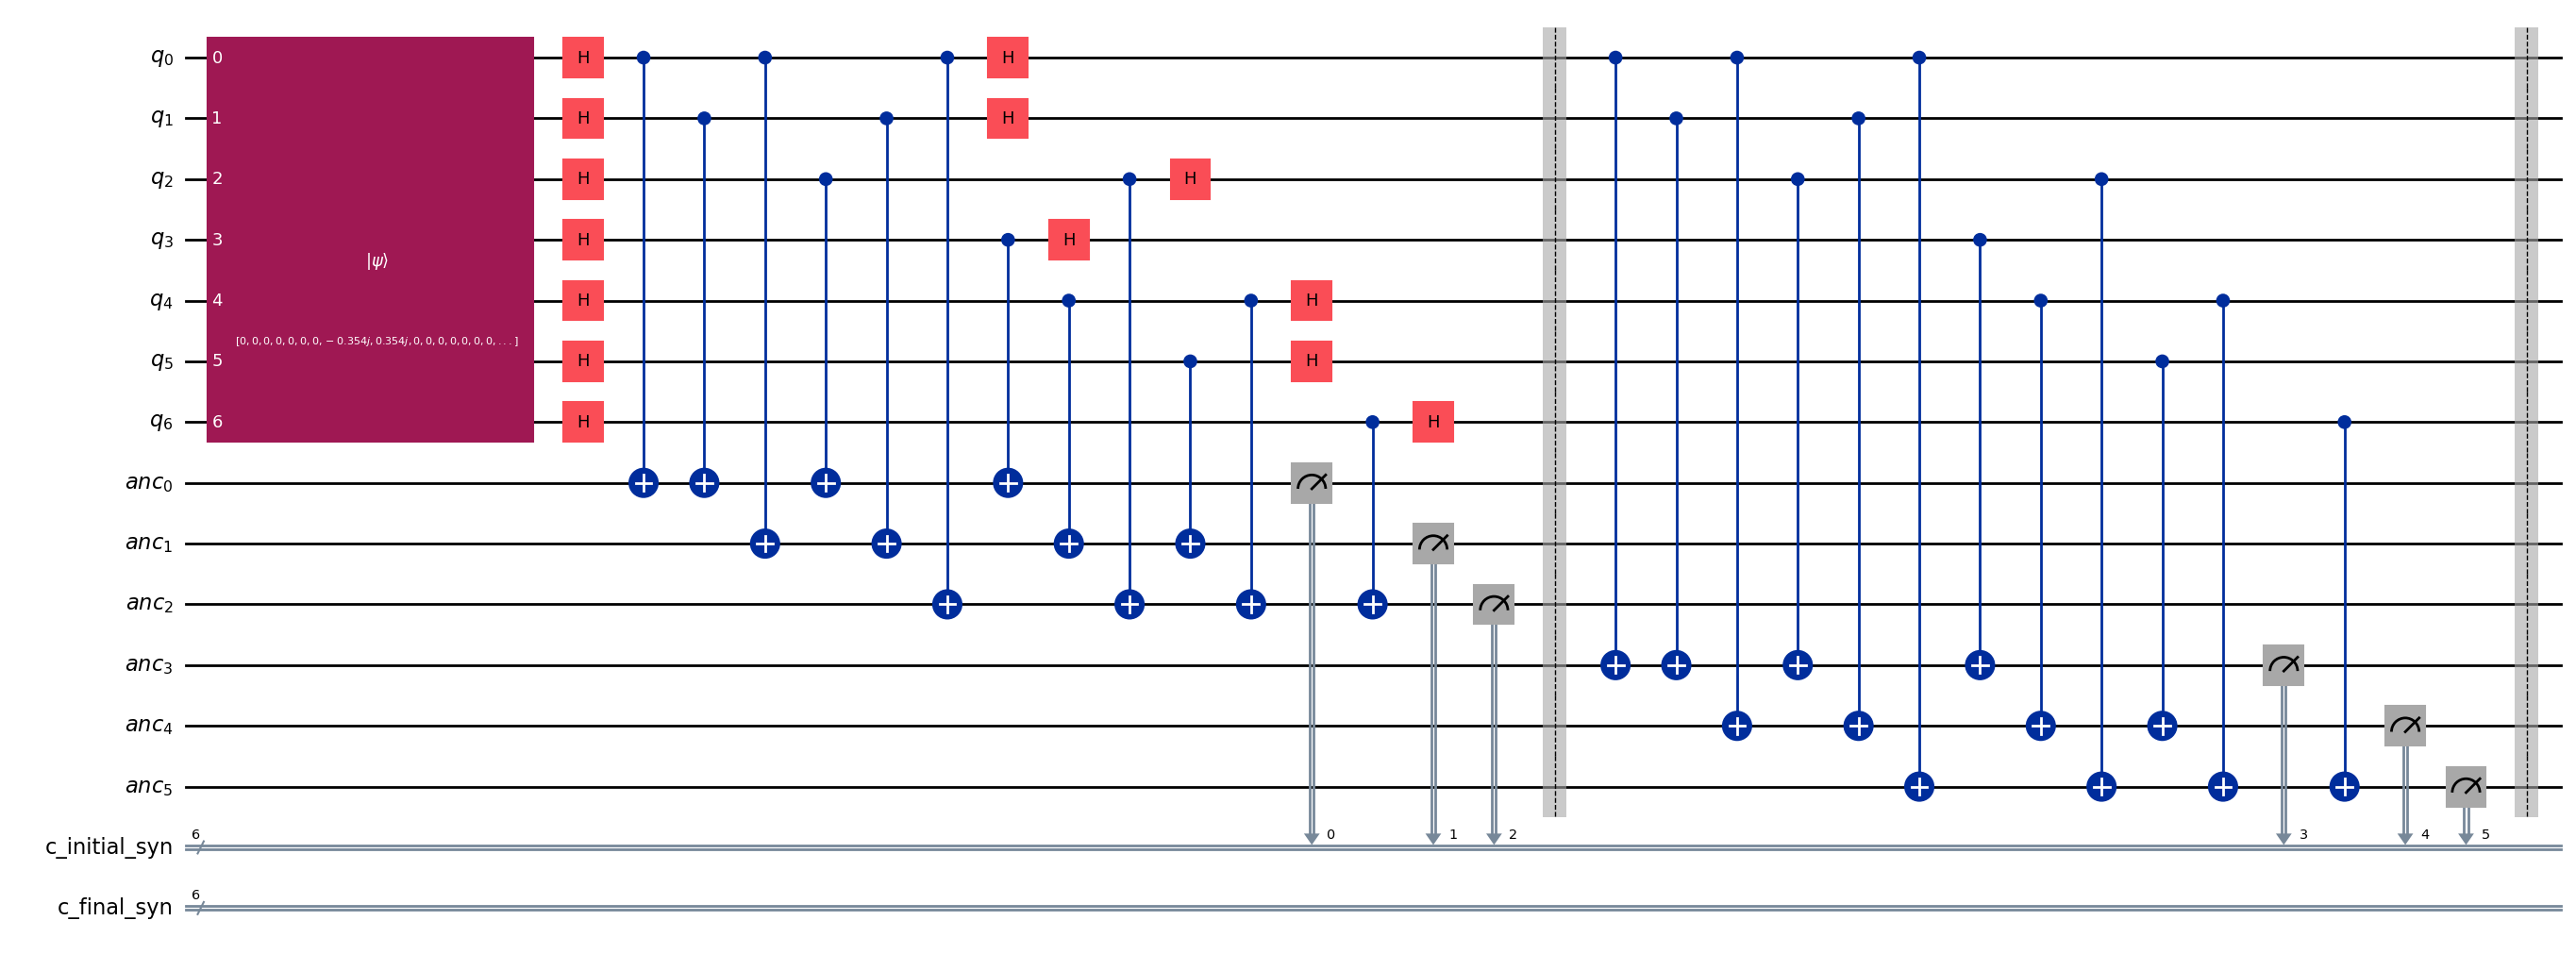

In [19]:
measure_steane_syndrome(qc, qr_data, qr_anc, cr_initial_syn)

qc.draw('mpl', fold=-1)


In [20]:
# --- Run the Simulation using AerSimulator
backend = AerSimulator()

#make quantum circuit compatible to the backend
pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
qc_isa = pm.run(qc)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 10000).result()[0].data.c_initial_syn.get_counts()
syndrome = list(counts.keys())[0]
error_code = steane_decoder_syndrome_map[syndrome]

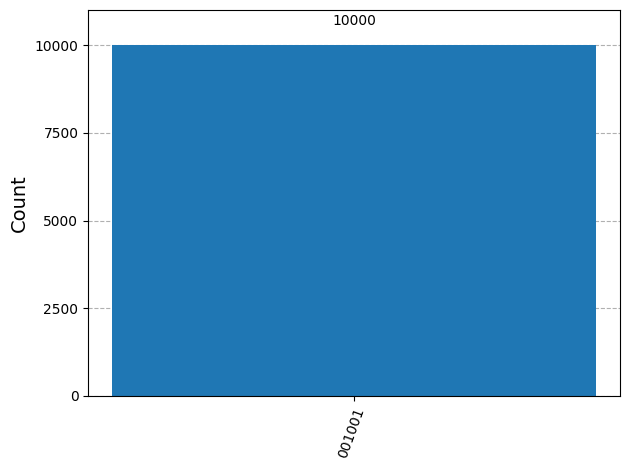

In [21]:
plot_histogram(counts)

In [22]:
grade_lab4_ex3(error_code)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [23]:
# Some helpful code to start Exercise 4.
# We will define the parity check matrices for the toric code
import numpy as np

HXtc = np.zeros((72, 144), dtype=int) # initializing the matrices
HZtc = np.zeros((72, 144), dtype=int)

# We will ask you to modify the matrices by adding 1s in appropriate places
# As an example, we will show how to do so for the first few rows of the toric code

# ---- TODO : Task 4 ---
# Write code to calculate HXtc and HZtc

# Define lattice dimensions
Lx = 12  # Number of rows
Ly = 6   # Number of columns

# Loop over all 72 stabilizers
for s in range(Lx * Ly):
    # Calculate the row (i) and column (k) for the current stabilizer
    i = int(np.floor(s / Ly))
    k = int(np.mod(s, Ly))

    # --- Populate HXtc (Star Stabilizers) ---
    # This operator connects a vertex to its four neighboring qubits.
    # Based on the pattern: q_h(i,k), q_h(i,k+1), q_v(i,k), q_v(i-1,k)
    
    # 1. Horizontal qubit to the right of the vertex
    HXtc[s, s] = 1
    
    # 2. Horizontal qubit to the left of the vertex
    HXtc[s, i * Ly + int(np.mod(k + 1, Ly))] = 1
    
    # 3. Vertical qubit below the vertex
    HXtc[s, s + (Lx * Ly)] = 1
    
    # 4. Vertical qubit above the vertex
    HXtc[s, (Lx * Ly) + int(np.mod(i - 1, Lx)) * Ly + k] = 1

    # --- Populate HZtc (Plaquette Stabilizers) ---
    # This operator connects the four qubits that form a face (plaquette).
    # Based on the pattern: q_h(i,k), q_h(i+1,k), q_v(i,k), q_v(i,k-1)
    
    # 1. Bottom horizontal qubit of the plaquette
    HZtc[s, s] = 1
    
    # 2. Top horizontal qubit of the plaquette
    HZtc[s, int(np.mod(i + 1, Lx)) * Ly + k] = 1
    
    # 3. Right vertical qubit of the plaquette
    HZtc[s, s + (Lx * Ly)] = 1
    
    # 4. Left vertical qubit of the plaquette
    HZtc[s, (Lx * Ly) + i * Ly + int(np.mod(k - 1, Ly))] = 1

# --- End of TODO ---

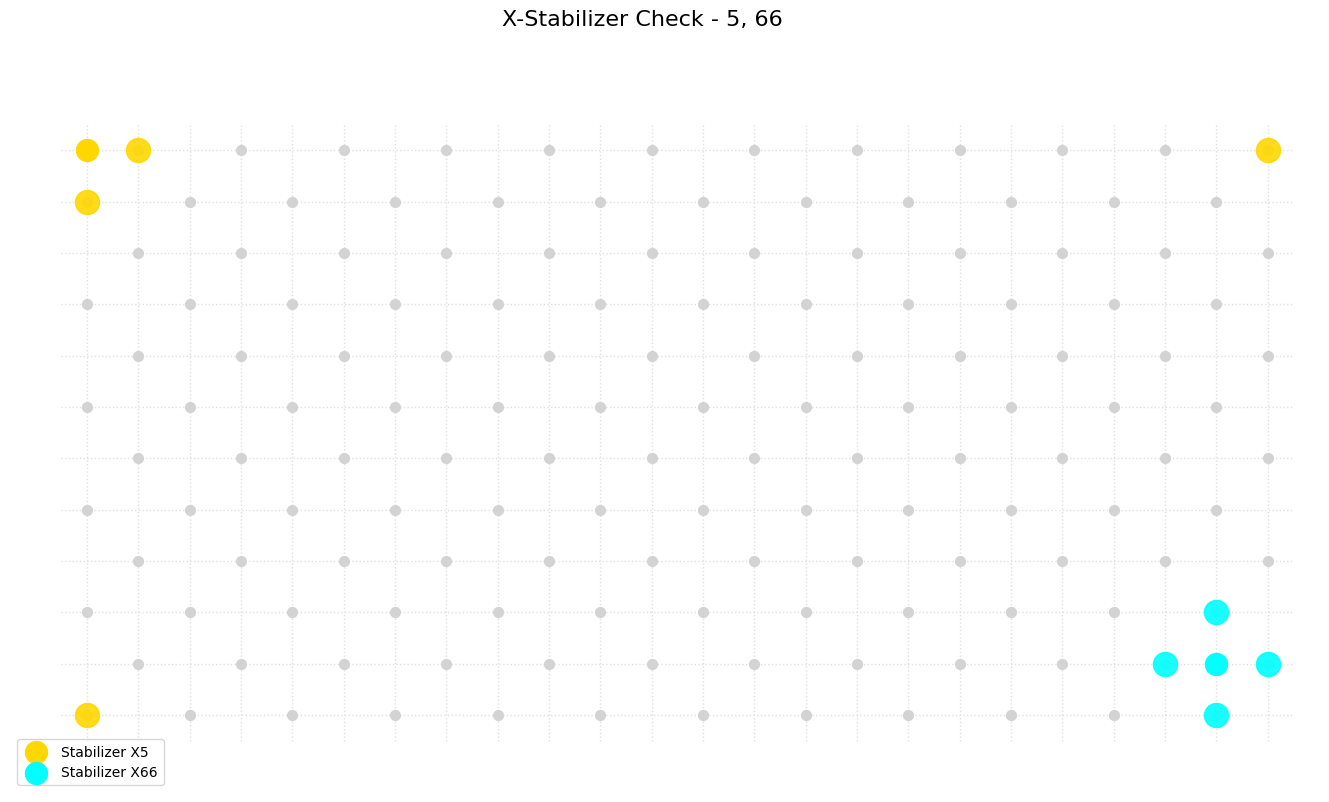

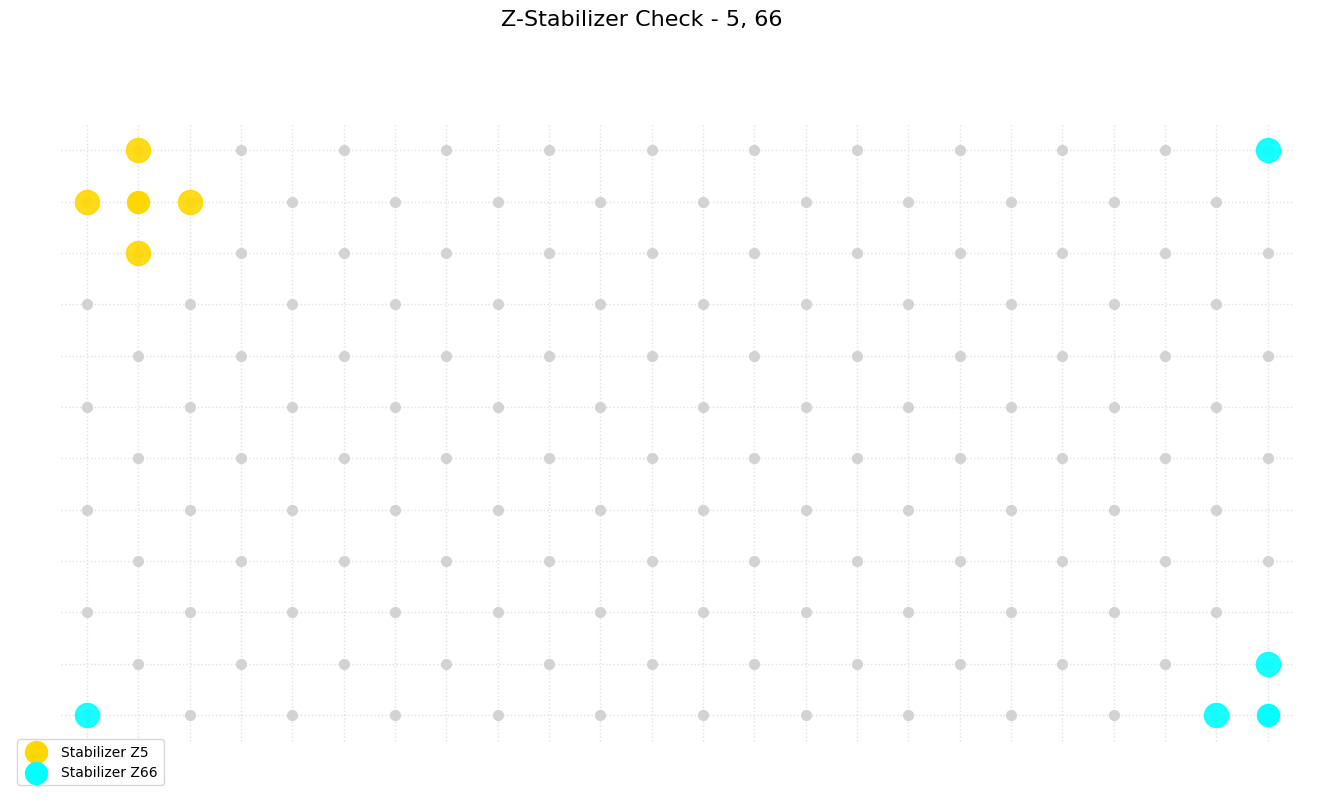

In [24]:
from lab4_util import generate_stabilizer_plots
generate_stabilizer_plots(HXtc, HZtc)

In [25]:
grade_lab4_ex4(HXtc, HZtc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [26]:
# We will define the parity check matrices for the gross code
import numpy as np
HXgc = np.zeros((72,144),dtype=int) # initializing the matrices
HZgc = np.zeros((72,144),dtype=int)

# ---- TODO : Task 5 ---
# Write code to calculate HXgc and HZgc

# Define lattice dimensions
Lx = 12  # Number of rows
Ly = 6   # Number of columns

# Loop over all 72 stabilizers
for s in range(Lx * Ly):
    # Calculate the row (i) and column (k) for the current stabilizer
    i = int(np.floor(s / Ly))
    k = int(np.mod(s, Ly))

    # --- Populate HXgc (X-type Stabilizers) ---
    # Each stabilizer has 4 local connections (like toric code) and 2 long-range connections.
    
    # Local connections
    HXgc[s, s] = 1                                                     # Horizontal qubit right
    HXgc[s, i * Ly + int(np.mod(k + 1, Ly))] = 1                         # Horizontal qubit left
    HXgc[s, s + (Lx * Ly)] = 1                                         # Vertical qubit below
    HXgc[s, (Lx * Ly) + int(np.mod(i - 1, Lx)) * Ly + k] = 1             # Vertical qubit above

    # Long-range connections
    HXgc[s, int(np.mod(i + 3, Lx)) * Ly + int(np.mod(k + 2, Ly))] = 1     # Long-range horizontal
    HXgc[s, (Lx*Ly) + int(np.mod(i - 2, Lx)) * Ly + int(np.mod(k + 3, Ly))] = 1 # Long-range vertical


    # --- Populate HZgc (Z-type Stabilizers) ---
    # Each stabilizer has 4 local connections and 2 long-range connections.
    
    # Local connections
    HZgc[s, s] = 1                                                     # Bottom horizontal qubit
    HZgc[s, int(np.mod(i + 1, Lx)) * Ly + k] = 1                         # Top horizontal qubit
    HZgc[s, s + (Lx * Ly)] = 1                                         # Right vertical qubit
    HZgc[s, (Lx*Ly) + i * Ly + int(np.mod(k - 1, Ly))] = 1               # Left vertical qubit

    # Long-range connections
    HZgc[s, int(np.mod(i + 2, Lx)) * Ly + int(np.mod(k + 3, Ly))] = 1     # Long-range horizontal
    HZgc[s, (Lx*Ly) + int(np.mod(i - 3, Lx)) * Ly + int(np.mod(k - 2, Ly))] = 1 # Long-range vertical

# --- End of TODO ---

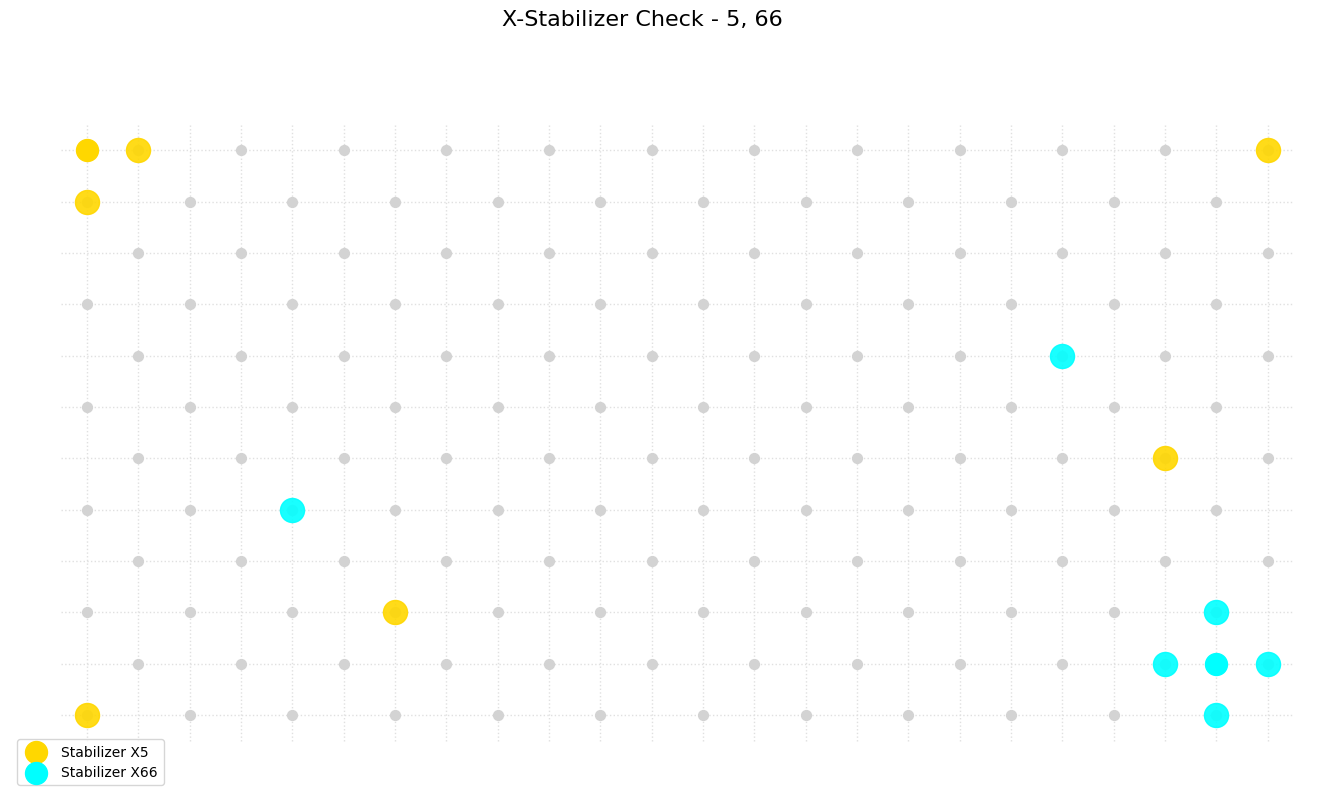

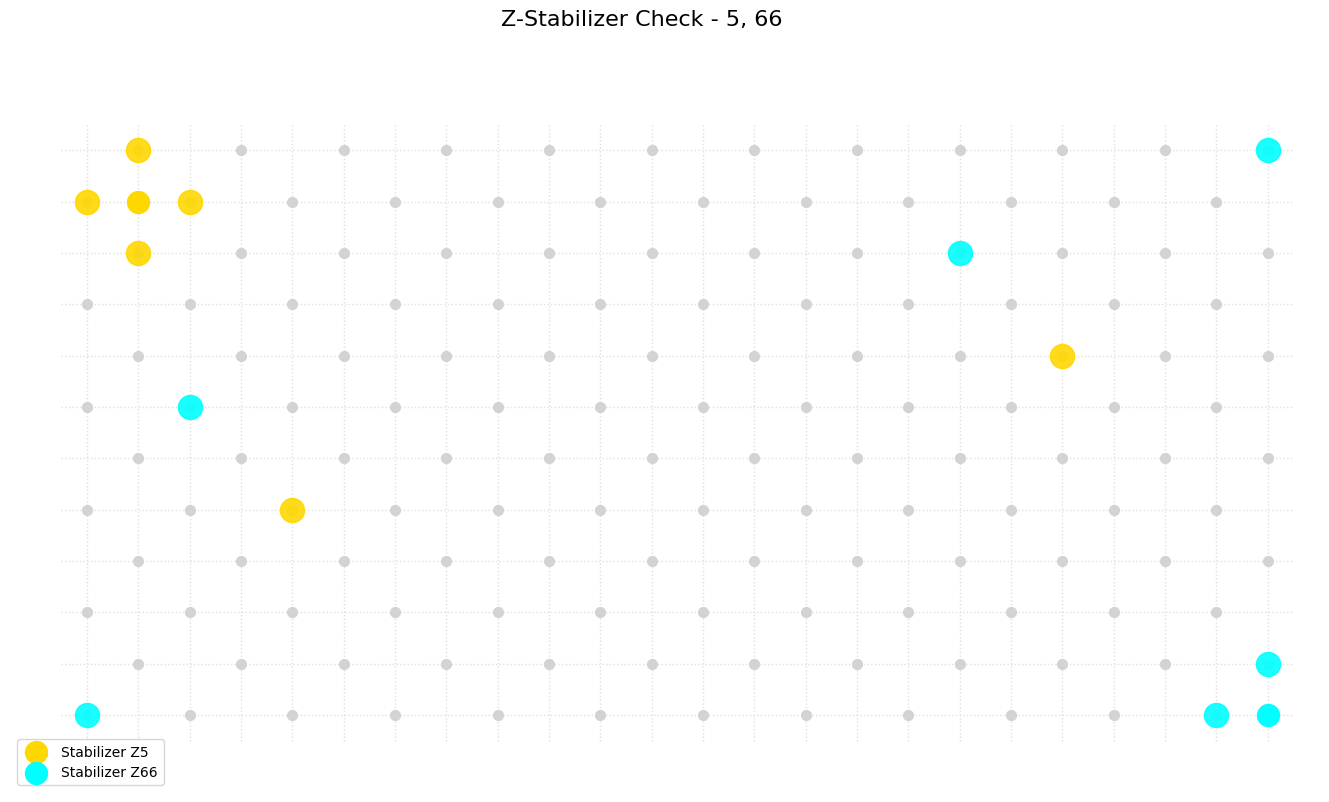

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [27]:
#Check stabilizer

generate_stabilizer_plots(HXgc, HZgc)

# Submit your answer using following code
grade_lab4_ex5(HXgc, HZgc)



In [28]:
# ---- TODO : Task 6 ---
# Write code to calculate k_toric and k_gross
# Hint: You can use the matrixRank imported from lab4_utils

# Import the rank function
from lab4_util import matrixRank

# Define the number of physical qubits
n = 144

# Toric code
# Calculate the rank of the X and Z stabilizer matrices
rx_toric = matrixRank(HXtc)
rz_toric = matrixRank(HZtc)
# Calculate the number of logical qubits
k_toric = n - rx_toric - rz_toric

# Gross code
# Calculate the rank of the X and Z stabilizer matrices
rx_gross = matrixRank(HXgc)
rz_gross = matrixRank(HZgc)
# Calculate the number of logical qubits
k_gross = n - rx_gross - rz_gross

# --- End of TODO ---

In [29]:
grade_lab4_ex6(k_toric, k_gross)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [31]:
# Check your submission status with the code below
from qc_grader.grader.grade import check_lab_completion_status

check_lab_completion_status("qgss_2025")


Lab 0: 2/2 exercises completed (100%)
    ✅ 2179 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1594 participants have completed this lab
Lab 2: 7/7 exercises completed (100%)
    ✅ 861 participants have completed this lab
Lab 3: 5/5 exercises completed (100%)
    ✅ 586 participants have completed this lab
Lab 4: 6/6 exercises completed (100%)
    ✅ 348 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 2 participants have completed this lab
